## 0. Libraries and Data

In [102]:
# IMPORTING AND LOADING LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
import sklearn
import xgboost as xgb
import scipy.stats as stats

from sklearn.model_selection import StratifiedKFold, KFold
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_log_error, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import VotingRegressor, RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.svm import SVR

## 1. EDA, Visualisations and Feature selection

In [103]:
# LOADING DATASET


df = pd.read_csv('/Users/abhishek/Downloads/train.csv')
test_df = pd.read_csv('/Users/abhishek/Downloads/test.csv')

In [104]:
# VIEWING THE COLUMNS IN THE DATASET

df.dtypes

id                              int64
store_sales(in millions)      float64
unit_sales(in millions)         int64
total_children                  int64
num_children_at_home            int64
avg_cars_at home(approx).1      int64
gross_weight                  float64
recyclable_package              int64
low_fat                         int64
units_per_case                  int64
store_sqft                      int64
coffee_bar                      int64
video_store                     int64
salad_bar                       int64
prepared_food                   int64
florist                         int64
cost                          float64
dtype: object

In [105]:
df.shape

(360336, 17)

In [106]:
df.describe()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000
mean,180167.500000,6.337376,3.043881,2.456482,0.689390,2.203813,13.822071,0.568086,0.327797,18.972706,28180.333442,0.564839,0.277394,0.504807,0.504832,0.503191,99.614729
std,104020.187637,3.307980,0.784676,1.488992,1.214732,1.084293,4.614792,0.495343,0.469411,10.212912,5968.874074,0.495779,0.447713,0.499978,0.499977,0.499991,29.939435
min,0.000000,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,90083.750000,3.720000,3.000000,1.000000,0.000000,1.000000,9.710000,0.000000,0.000000,10.000000,23593.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.320000
50%,180167.500000,5.780000,3.000000,2.000000,0.000000,2.000000,13.600000,1.000000,0.000000,20.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.810000
75%,270251.250000,8.400000,4.000000,4.000000,1.000000,3.000000,17.700000,1.000000,1.000000,28.000000,33858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,360335.000000,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [107]:
#Checking missing values

df.isna().sum()

id                            0
store_sales(in millions)      0
unit_sales(in millions)       0
total_children                0
num_children_at_home          0
avg_cars_at home(approx).1    0
gross_weight                  0
recyclable_package            0
low_fat                       0
units_per_case                0
store_sqft                    0
coffee_bar                    0
video_store                   0
salad_bar                     0
prepared_food                 0
florist                       0
cost                          0
dtype: int64

In [108]:
# LOOKING FOR DUPLICATES

df.loc[df.duplicated()]

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost


In [109]:
# BOX PLOT TO CHECK OUTLIERS

columns_bp = list(df.columns)

def remove_values_from_list(lst, *vals):
    return [value for value in lst if value not in vals]

new_list = remove_values_from_list(columns_bp, 'id','recyclable_package', 'low_fat', 'coffee_bar', 'video_store', 'salad_bar', 
                 'prepared_food', 'florist', 'cost' )

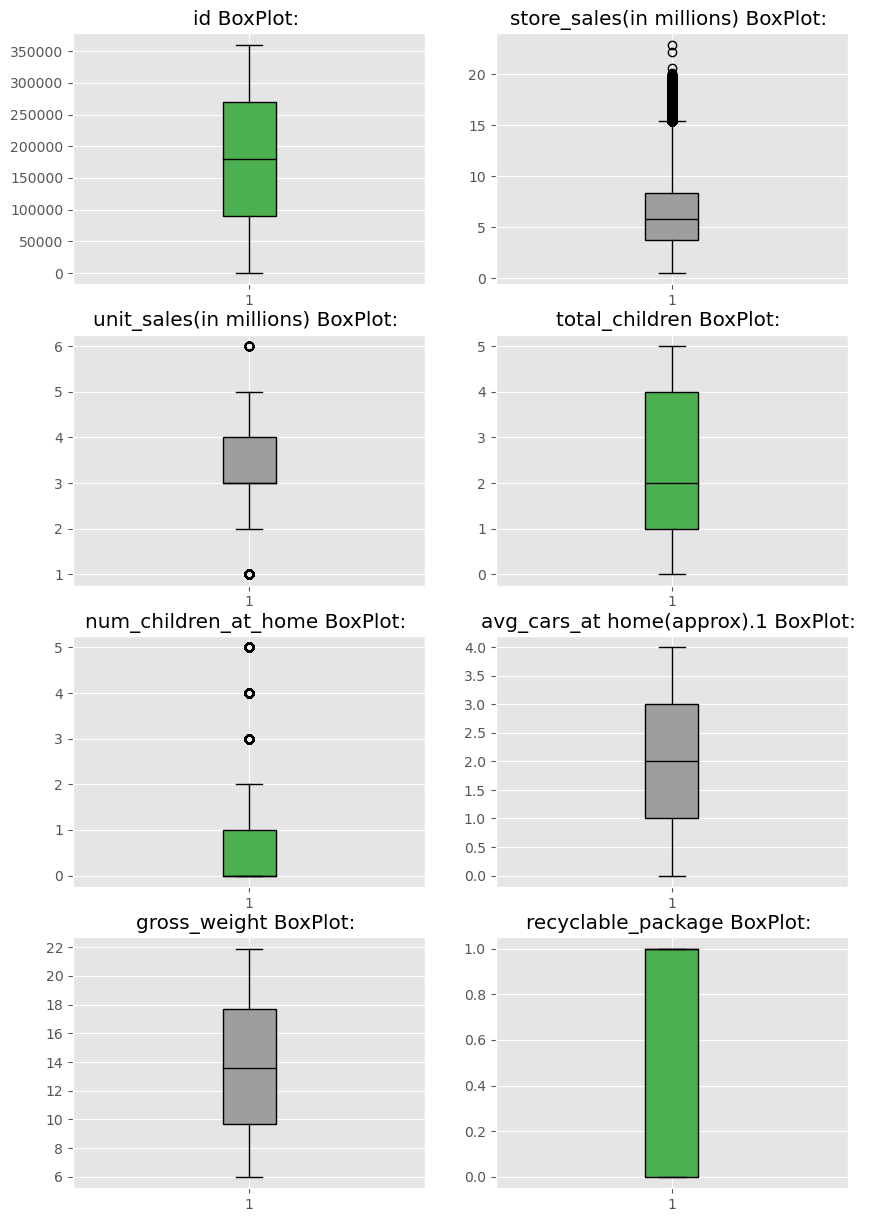

In [110]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10, 15))
colors = ['#4CAF50','#9E9E9E', '#9E9E9E', '#4CAF50', '#4CAF50','#9E9E9E','#9E9E9E', '#4CAF50']

for i, ax in enumerate(axs.flatten()):
    col_name = columns_bp[i]
    color = colors[i]
    bp = ax.boxplot(df[col_name], patch_artist=True, medianprops=dict(color='black'))
    for patch in bp['boxes']:
        patch.set_facecolor(color)
    ax.set_title(f'{col_name} BoxPlot: ')

plt.show()

In [111]:
#Finding number of Numerical and Categorical Variables.

columns = list(df.columns)
columns.remove('id')

cat = 0
num = 0

for i in range(16):
    if df[columns[i]].nunique() <= 10:
        cat+=1
        
    else:
        num+=1
        
print('No. of Numerical Variables:', num)
print('No. of Categorical Variables:', cat)


No. of Numerical Variables: 5
No. of Categorical Variables: 11


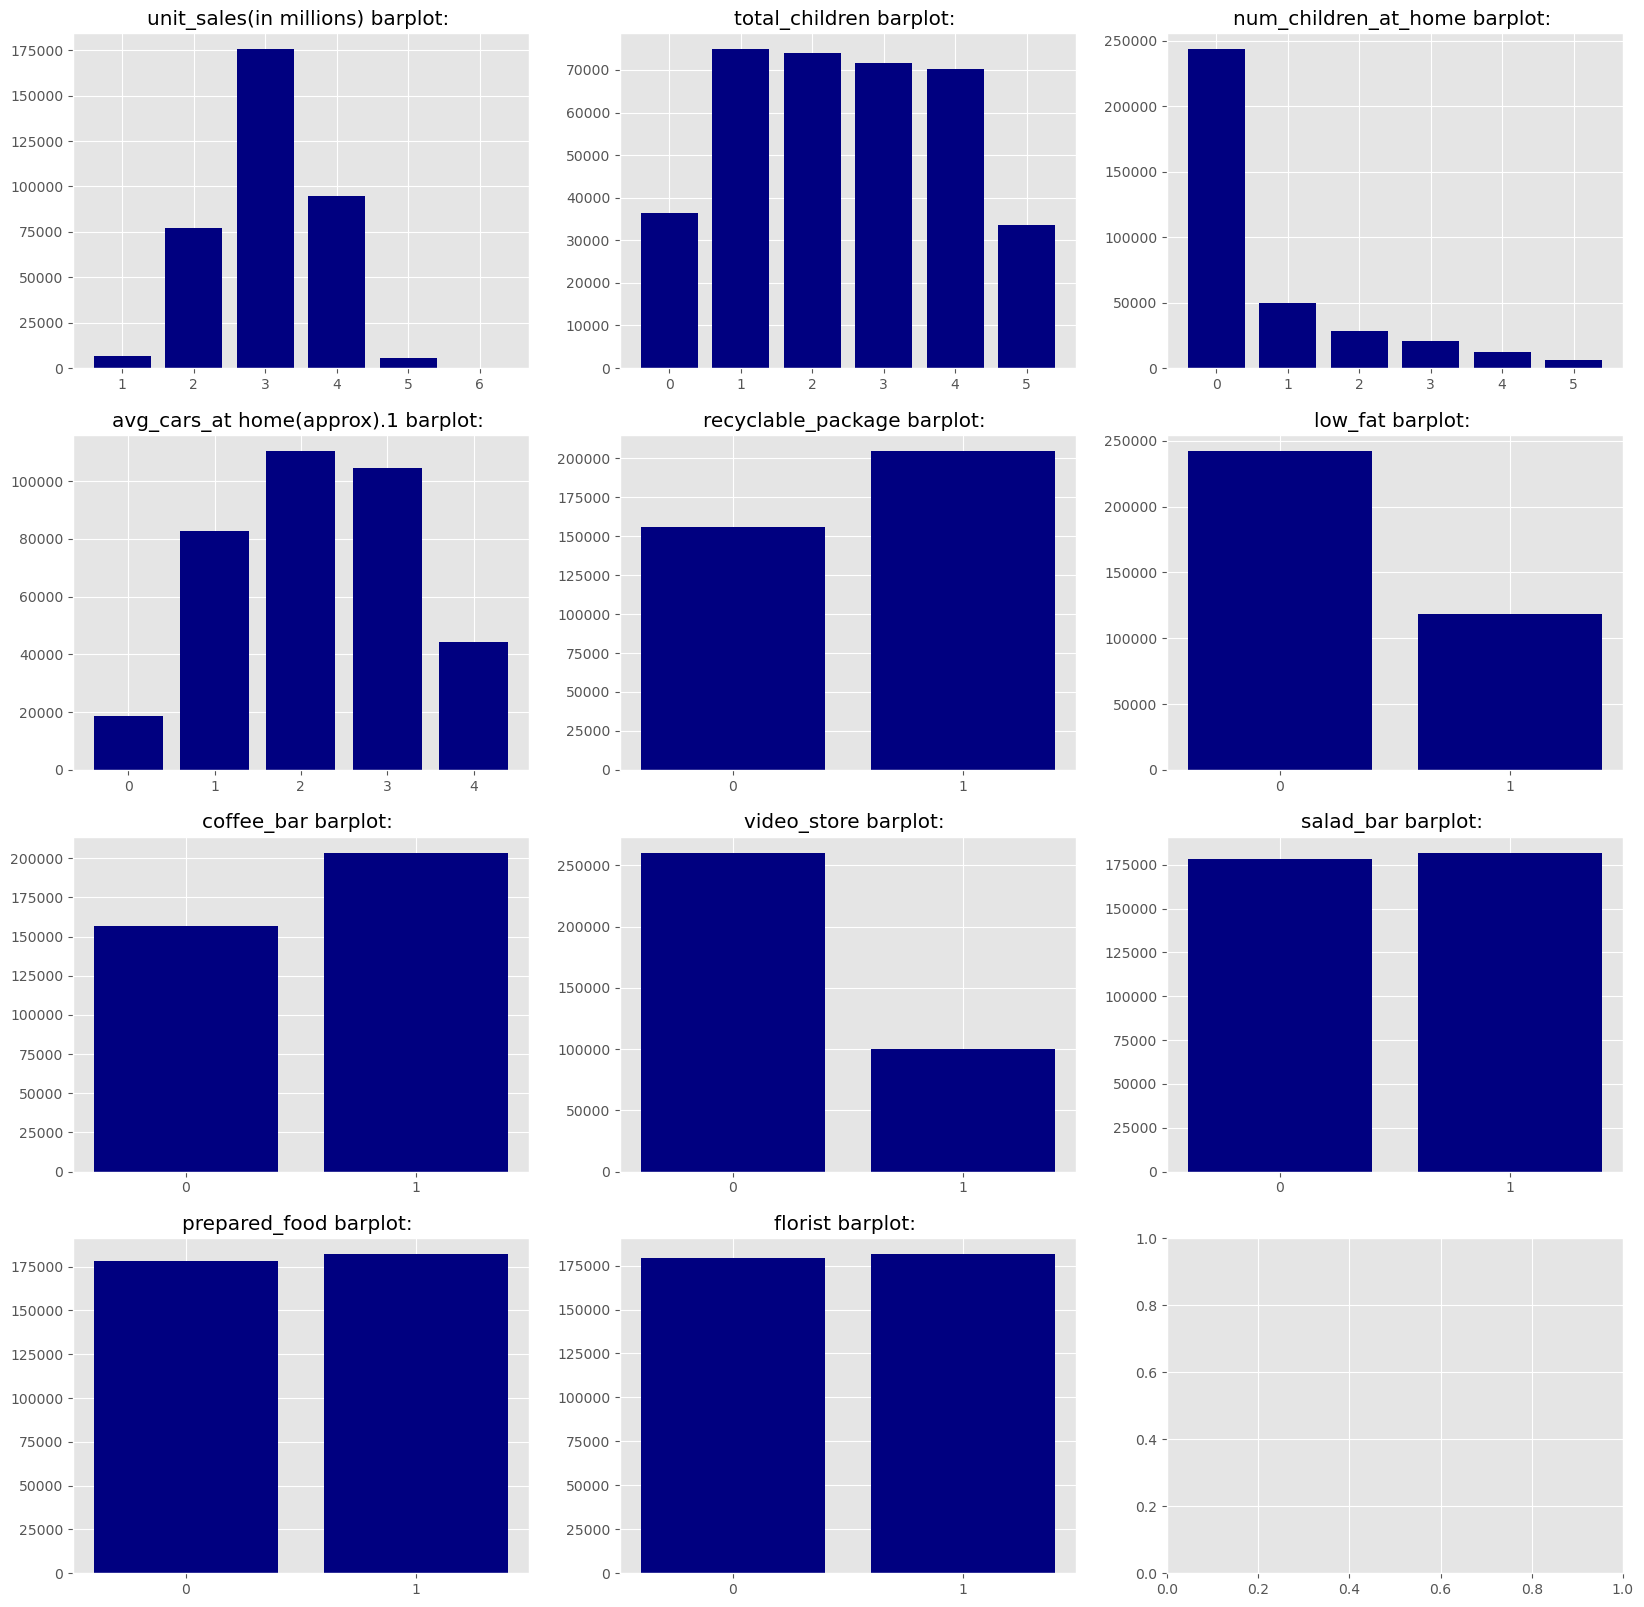

In [112]:
#Barplot for categorical variables



cat_df = pd.DataFrame()
num_df = pd.DataFrame()

for col in df.columns:
    if df[col].nunique() < 10:
        cat_df[col] = df[col]
    else:
        num_df[col] = df[col]

        
num_df = num_df.drop('id', axis=1)

columns_cat = list(cat_df.columns)
columns_num = list(num_df.columns)

fig_cat, ax1 = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
ax1 = ax1.ravel()

for i in range(11):
        ax1[i].bar(cat_df[columns_cat[i]].value_counts().sort_index().index, cat_df[columns_cat[i]].value_counts().sort_index().values, color='navy') 
        ax1[i].set_xticks(cat_df[columns_cat[i]].value_counts().sort_index().index)
        ax1[i].set_title(f'{columns_cat[i]} barplot: ')


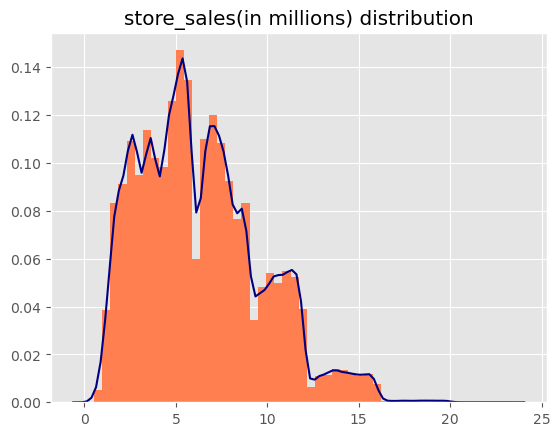

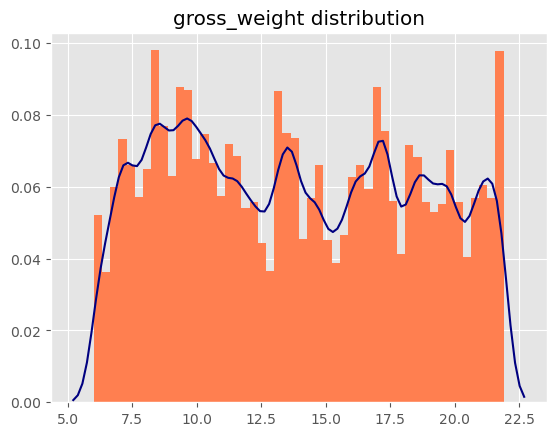

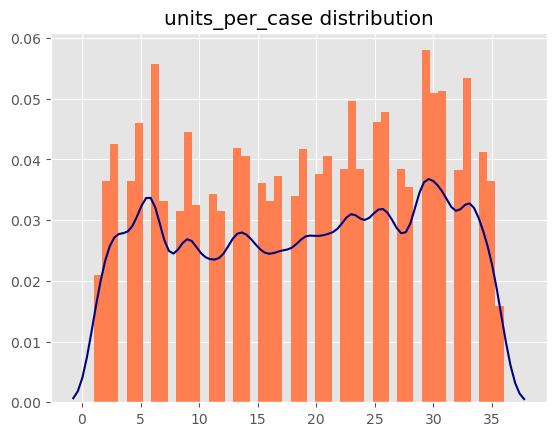

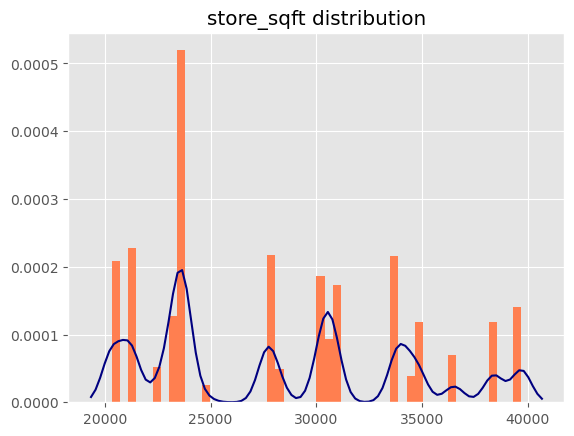

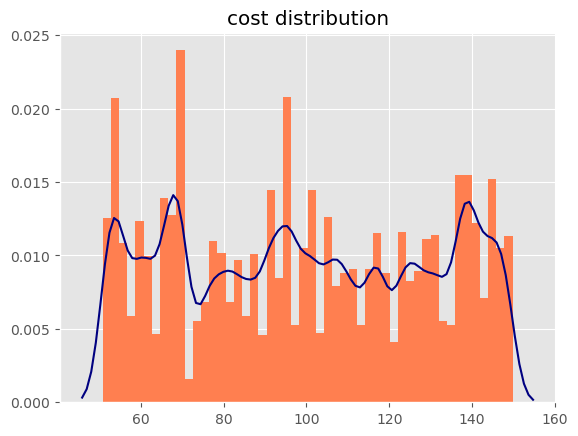

In [113]:
# Histogram with distribution curves for numerical variables

for i in range(5):
    fig_num, ax2 = plt.subplots()
    ax2.hist(num_df[columns_num[i]], bins=50, density=True, color='coral')
    ax2.set_title(f'{columns_num[i]} distribution')
    xmin, xmax = ax2.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    kde = stats.gaussian_kde(num_df[columns_num[i]])
    ax2.plot(x, kde(x), color='navy')
    plt.show()

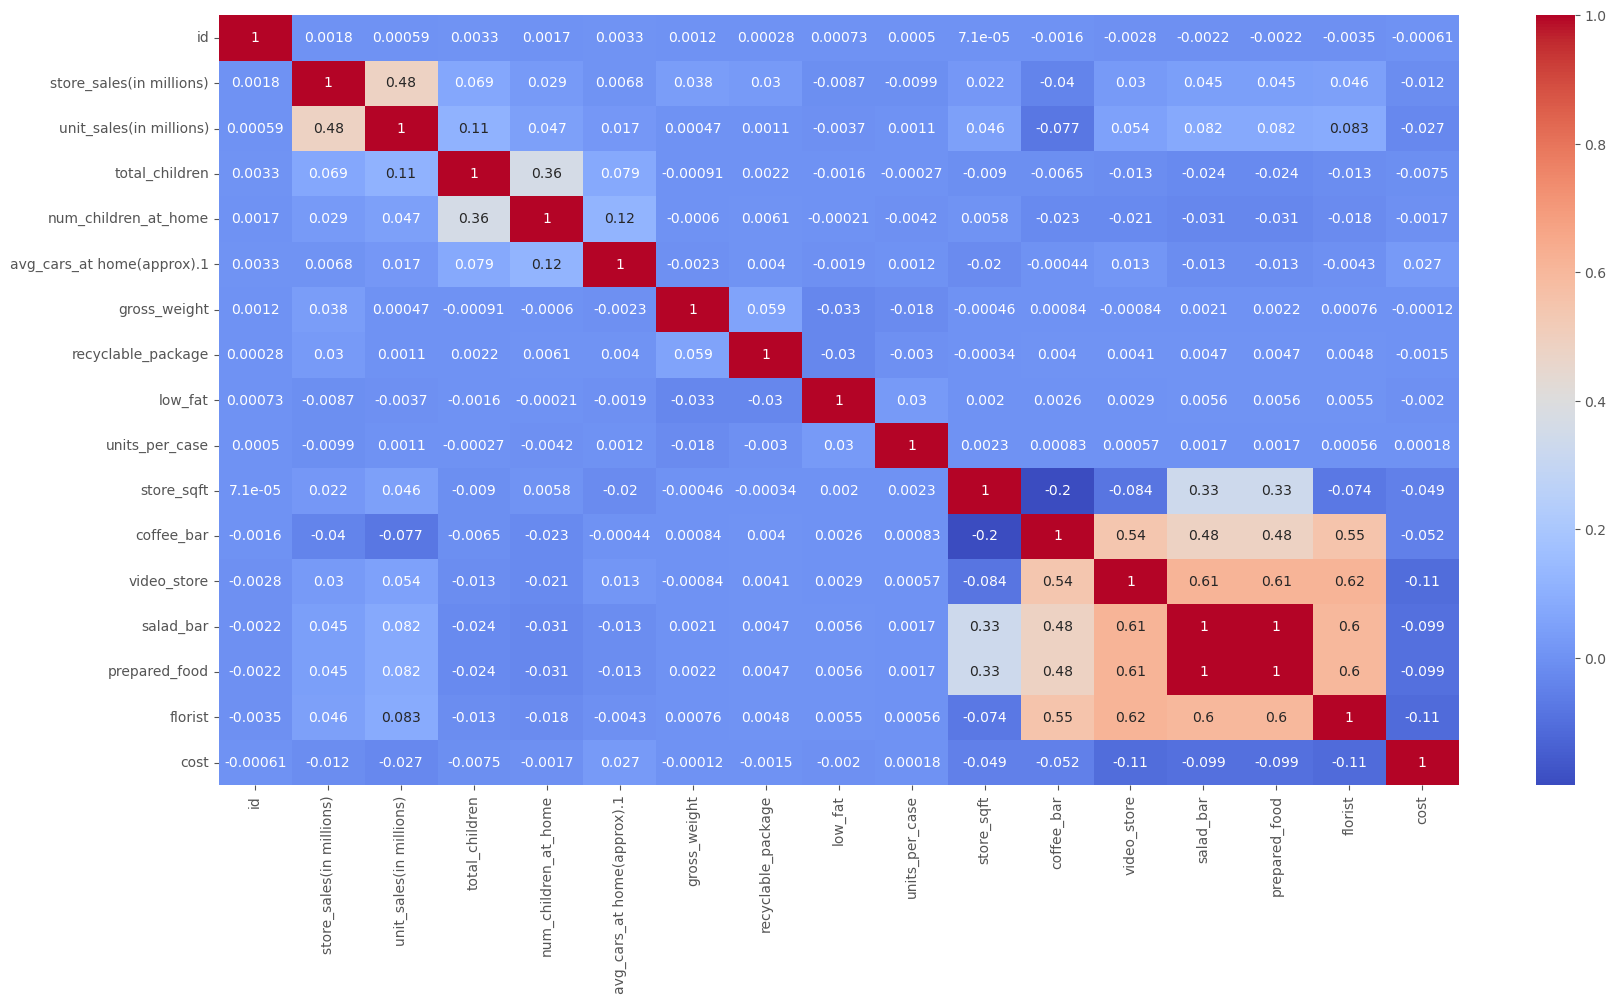

In [114]:
# Correlation matrix


corr_matrix = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

In [115]:
# From the correlation plot, florist, video_store, prepared_food, salad_bar has the most correlation to cost
# Features are selected based on https://www.kaggle.com/competitions/playground-series-s3e11/discussion/396508
# SELECTED_FEATURES = ['total_children','num_children_at_home', 'avg_cars_at home(approx).1','low_fat','store_sqft','coffee_bar','video_store','prepared_food','florist']

df = df.drop(['id', 'store_sales(in millions)', 'unit_sales(in millions)', 'gross_weight', 'recyclable_package', 'units_per_case', 'salad_bar'], axis=1)
dff = test_df.drop(['store_sales(in millions)', 'unit_sales(in millions)', 'gross_weight', 'recyclable_package', 'units_per_case', 'salad_bar'], axis=1)
test_df = test_df.drop(['id', 'store_sales(in millions)', 'unit_sales(in millions)', 'gross_weight', 'recyclable_package', 'units_per_case', 'salad_bar'], axis=1)

## 2. Modelling

In [116]:
# Test train split

X_train, X_val, y_train, y_val = train_test_split(df.drop(['cost'], axis=1), df['cost'], test_size=0.2, random_state=42)

In [117]:
# Defining models
dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(n_estimators=100, random_state=0)
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', 
                           n_estimators=500, 
                           max_depth=10, 
                           learning_rate=0.1, 
                           subsample=0.8, 
                           colsample_bytree=0.8, 
                           random_state=42)

In [118]:
# Decision tree regressor and hyperparameter tuning

param_grid_dt = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}


In [119]:
scoring_metric = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_log_error(y_true, y_pred)), greater_is_better=False)

In [120]:
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring=scoring_metric)

In [121]:
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(<lambda>, greater_is_better=False))

In [122]:
print('Best hyperparameters:', grid_search_dt.best_params_)
print('RMSE:', np.sqrt(-grid_search_dt.best_score_))

Best hyperparameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
RMSE: 0.5452471753512533


In [123]:
dt = DecisionTreeRegressor(max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=10, random_state=42)

In [124]:
#Creating voting regressor containing decision tree, random forest and XGBoost models

voting_regressor = VotingRegressor(estimators=[('dt', dt), ('rf', rf), ('xgb_reg', xgb_reg)])


In [125]:
#Fitting test data

voting_regressor.fit(X_train, y_train)

VotingRegressor(estimators=[('dt',
                             DecisionTreeRegressor(min_samples_leaf=4,
                                                   min_samples_split=10,
                                                   random_state=42)),
                            ('rf', RandomForestRegressor(random_state=0)),
                            ('xgb_reg',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.8,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_...
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.1, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=10,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=500, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=42, ...))])

In [126]:
#Saving predictions

predictions = voting_regressor.predict(X_val)

In [127]:
# Finding RMSLE score

rmsle_score = mean_squared_log_error(y_val, predictions, squared=False)
print("Root Mean squared log error of Voting Regressor: ", rmsle_score)

Root Mean squared log error of Voting Regressor:  0.2973799448882798


In [128]:
#Fitting test dataset

voting_regressor.fit(df.drop(['cost'], axis=1), df['cost'])

VotingRegressor(estimators=[('dt',
                             DecisionTreeRegressor(min_samples_leaf=4,
                                                   min_samples_split=10,
                                                   random_state=42)),
                            ('rf', RandomForestRegressor(random_state=0)),
                            ('xgb_reg',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.8,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_...
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.1, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=10,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=500, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=42, ...))])

In [129]:
predictions_1 = voting_regressor.predict(test_df)

In [130]:
# Saving submission

submission = pd.DataFrame({'id': dff['id'], 'cost': predictions_1})
submission.to_csv('RandomDecisionXGB.csv', index=False)